In [1]:
from pycap import PropertyTree, CyclicVoltammetry
import sys
sys.path.append('/notebooks')
from battery import Dualfoil
from matplotlib import pyplot
from pycap import initialize_data, plot_data
from pickle import dump, load
import numpy as np

%matplotlib inline

In [2]:
file_path = '/notebooks/docker/dualfoil5-1/'
df = Dualfoil(path=file_path)

In [13]:
# shorter voltage interval with smaller step
# more reasonable current range
v1 = 4.0
v2 = 3.6
step_size = .01
ptree = PropertyTree()
ptree.put_double('cycles', 2)
ptree.put_double('scan_limit_1', v1)
ptree.put_double('scan_limit_2', v2)
ptree.put_double('initial_voltage', v1)
ptree.put_double('final_voltage', v1)
ptree.put_double('scan_rate', .8e-3)
ptree.put_double('step_size', step_size)

In [14]:
data = initialize_data()

df.reset()
exp = CyclicVoltammetry(ptree)
%time exp.run(df, data)


..................................................................................................................................................................................CPU times: user 1.56 s, sys: 6.12 s, total: 7.68 s
Wall time: 10min 49s


177

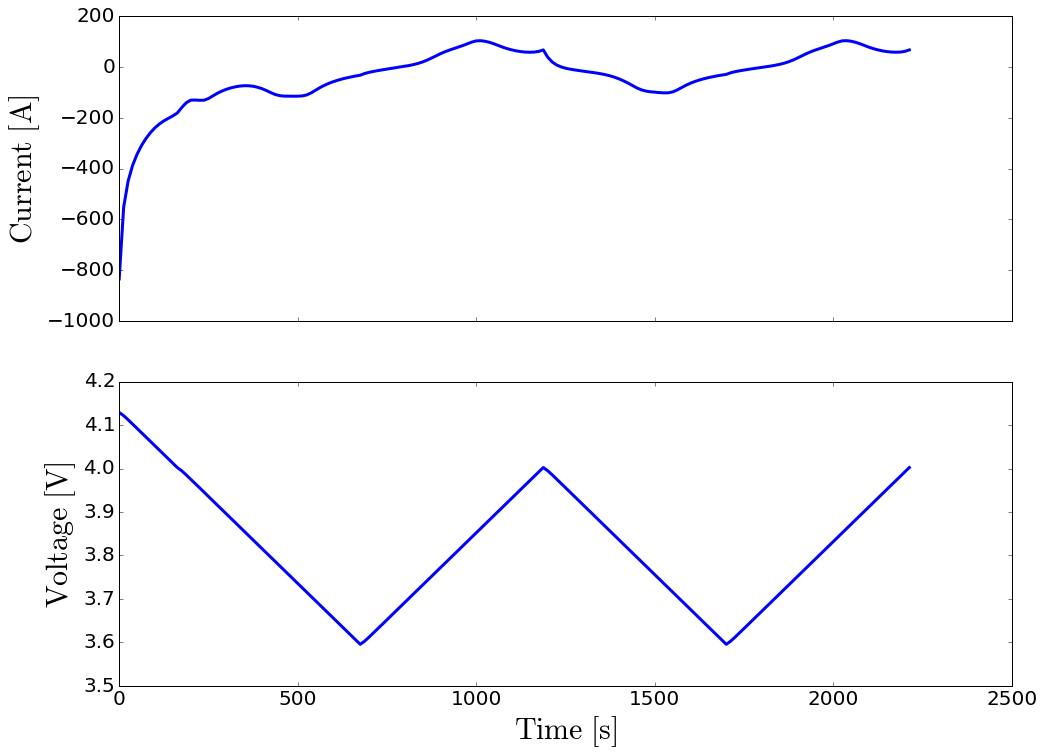

In [15]:
plot_data(data)

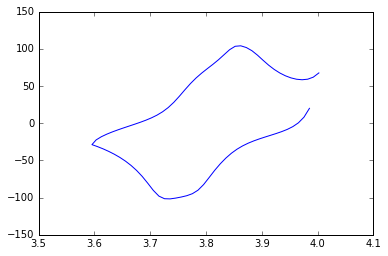

In [16]:
# variable to count the number of steps per cycle
# used to print only one cycle
cycle = int(2*((v1-(v2-step_size)) / step_size))
# print only last cycle
y = data['current'][-cycle:]
x = data['voltage'][-cycle:]
pyplot.plot(x, y)

In [17]:
with open('data_dumps/stacked_voltammetry5.dat', 'wb') as fout:
    dump(data, fout)

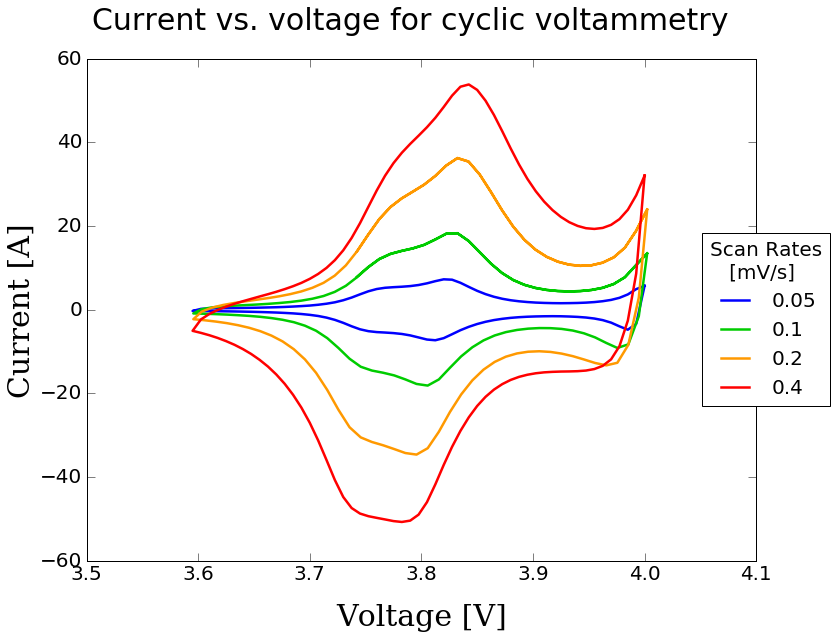

In [23]:
fig = pyplot.figure(figsize=(12, 9))
fig.suptitle('Current vs. voltage for cyclic voltammetry',
             fontsize=30, fontname='sans-serif')
ax = fig.gca()
ax.set_xlabel('Voltage [V]', fontsize='30', fontname='serif',
              labelpad=20)
ax.set_ylabel('Current [A]', fontsize='30', fontname='serif')
ax.tick_params(axis='both', labelsize=20, length=8)

lines = []
# list of color hex strings
cm = ['#0000ff', '#00cc00', '#ff9900', '#ff0000']

for i in range (1, 5):
    # get each dumped data and then plot it
    dumped_data = load(open('data_dumps/stacked_voltammetry%i.dat' %(i), 'rb'))
    
    # variable to help print only the last cycle
    # smaller scans would not accept the same step size as the rest,
    #     so it's cycle number is different
    if i < 5:
        cycle = 108
    else:
        cycle = 85

    # print only last cycle
    x = dumped_data['voltage'][-cycle-1:]
    y = dumped_data['current'][-cycle-1:]
    
    ax.set_xbound(3.5, 4.1)
    line = ax.plot(x, y, cm[i-1], lw=2.5)
    lines.extend(line)

lines = tuple(lines)
legend = fig.legend(lines, ('0.05', '0.1', '0.2', '0.4', '0.8'),
                    loc=5, title='Scan Rates\n   [mV/s]', fontsize=20)
p = pyplot.setp(legend.get_title(), fontsize=20)